# __Deducing Heart Disease in Patients__ #

#### Ali Abbas, Jayson Wu, Ria Perencsik, and Durrotul Salma ####
<br>

## __Introduction__ ##

### Background Information ###
Heart disease describes a range of conditions that affect the heart, such as coronary heart disease and cardiomyopathy. Heart disease affects millions globally and is a major health concern, taking an estimated 17.9 million lives each year. One third of these deaths occur prematurely in people under 70 years of age. Many factors like high blood pressure and high cholesterol are associated with an increased risk of heart disease. 

The importance of identifying heart disease in patients early cannot be overstated. <br> As such, this project aims to assess the efficacy of predicting a patient's likelihood of having heart disease based on two key factors: 
 - __ST depression__ (Note: ST corresponds to a segment seen in an ECG test. If the segment appears abnormally low and sits below the baseline, the person is said to have ST depression)
 - __maximum heart rate__

to answer the question: <br>
*How accurately can the presence of heart disease be predicted in patients through the classification of ST depression induced by exercise relative to rest and maximum heart rate as key factors in the assessment?*

### Datasets Used ###
We utilized the datasets: 'processed.cleveland.data', 'reprocessed.hungarian.data', 'processed.switzerland.data', and 'processed.va.data' from the Heart Disease Database to answer this question.

<br> The column names created by the dataset are as follows: 

1. **Age** - Patient's age
2. **Sex** - Patient's sex
3. **Chest_Pain_Type** - Patient's chest pain type
4. **Resting_Blood_Pressure** - Patient's Resting blood pressure
5. **Cholesterol** - Patient's serum cholesterol level (mg/dl)
6. **Fasting_blood_sugar_over_120_mg/dl** - True if patient's fasting blood sugar > 120mg/dl
7. **Resting_ecg_results** - Patient's resting electrocardiographic results
8. **Max_heart_rate** - Patient's maximum heart rate
9. **Exercise_induced_angina** - 'yes' if patient's exercise induced angina, 'no' otherwise
10. **ST_depression_induced_by_exercise_relative_to_rest** - Patient's ST Depression induced by exercise relative to rest levels
11. **slope_of_the_peak_exercise_ST_segment** - The slope of the peak exercise ST segment ('downsloping', 'flat', or 'upsloping')
12. **Number_of_major_vessels_colored_by_flourosopy** - Number of major vessels (0-3) colored by flourosopy
13. **Thalassemia** - Presence of thalassemia in a patient ('fixed', 'reversible', or 'normal')
14. **Class** - Diagnosis of heart disease ('healthy' or 'sick')


Among these variables, ST depression and maximum heart rate were selected as predictors for the classification analysis due to their superior ability to form distinct clusters between healthy and sick groups compared to other factors in the dataset.

<br>

## __Methods and Results__ ##

As mentioned in `worksheet_classification2.ipynb`, we are to call `set.seed` exactly once at the beginning of the analysis, so that our random numbers are actually reasonably random.

In [1]:
set.seed(1234)

### Reading the data set from the web into R ###

In [2]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(readxl)
library(tidymodels)
# library(rvest)
# library(stringr)
# install.packages('janitor')
# library(janitor)
library(ggplot2)
install.packages("kknn")
library(kknn)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [3]:
# reading a csv file containing the data in processed.cleveland.data, 
# with a row of column names (these names are essentially the column names specified in cleve.mod, under ‘Original atts’, without the stuff in brackets)
options(repr.matrix.max.rows = 25)

cleveland_dataset_web <- read_csv(file = url("https://archive.ics.uci.edu/static/public/45/data.csv"))

# extracting the column names from the very first line of the csv file (because the other files I plan to import do not contain column names)
first_row_contents <- read_csv(file = url("https://archive.ics.uci.edu/static/public/45/data.csv"), n_max = 1) |> names()

# reading a file containing the data in processed.switzerland.data
switzerland_dataset_web <- read_delim(file = url("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data"), 
                                    delim = ",", col_names = first_row_contents) |>
                        mutate(trestbps = as.numeric(trestbps), chol = as.numeric(chol), fbs = as.numeric(fbs), restecg = as.numeric(restecg), 
                               thalach = as.numeric(thalach), exang = as.numeric(exang), oldpeak = as.numeric(oldpeak),
                               slope = as.numeric(slope), ca = as.numeric(ca), thal = as.numeric(thal))

# reading a file containing the data in processed.va.data
virginia_dataset_web <- read_delim(file = url("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data"), 
                                    delim = ",", col_names = first_row_contents) |>
                        mutate(trestbps = as.numeric(trestbps), chol = as.numeric(chol), fbs = as.numeric(fbs), 
                               thalach = as.numeric(thalach), exang = as.numeric(exang), oldpeak = as.numeric(oldpeak),
                               slope = as.numeric(slope), ca = as.numeric(ca), thal = as.numeric(thal))

# reading a file containing the data in reprocessed.hungarian.data
reprocessed_hungarian_dataset_web <- read_delim(file = url("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/reprocessed.hungarian.data"), 
                                    delim = " ", col_names = first_row_contents) |>
                        mutate(trestbps = as.numeric(trestbps), chol = as.numeric(chol), fbs = as.numeric(fbs), restecg = as.numeric(restecg), 
                               thalach = as.numeric(thalach), exang = as.numeric(exang), oldpeak = as.numeric(oldpeak),
                               slope = as.numeric(slope), ca = as.numeric(ca), thal = as.numeric(thal))

# reading the file titled heart-disease.names, because I will reference information when justifying some of the decisions we made as far as tidying the data is concerned
notes_about_data <- read_file(file = url("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names"))

global_dataset_missing <- bind_rows(cleveland_dataset_web, switzerland_dataset_web, virginia_dataset_web, reprocessed_hungarian_dataset_web)

global_dataset_missing_first_25_rows <- global_dataset_missing |> slice(1:25)
# global_dataset_missing_first_25_rows

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 123 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal
dbl (5): age, sex, cp, chol, num

ℹ Use `spec()` to retrieve the full column specification for this data

Here we convert the value -9 into NA, because of this excerpt from the file named heart-disease.names: 
> "Missing Attribute Values: Several.  Distinguished with value -9.0."

In [4]:
na_matrix <- global_dataset_missing == "-9"

is.na(global_dataset_missing) <- na_matrix

### Cleaning and wrangling the data into a tidy format ###

#### 1) summarizing the data in at least one table using only training data: ####

we now try to create
a table that reports 
the number of healthy and sick observations,
the number of rows with missing values for healthy and sick observations,
the percentage of healthy and sick observations,
the average ages, resting blood pressures, cholesterol,
 max heart rate, ST depression induced by exercise relative to rest,
and the average number of vessels colored by flourosopy for healthy and sick observations
for each class in our dataset

The description of the num attribute in heart-disease.names doesn't match the possible values of num in any of the 4 data files we're using in our analysis.

here are the discrepancies:

a) under the subsection of heart-disease.names titled "7. Attribute Information", 
it states that num can either be 0 or 1, but looking through our data, values of num in the range 0:4 can be found within the first 25 rows of global_dataset

b) under the subsection of heart-disease.names titled "7. Attribute Information", it is also stated that 0 indicates < 50% diameter narrowing,
while 1 indicates > 50% diameter narrowing. However, it contradicts the description of num under the subsection of heart-disease.names titled "4. Relevant Information",
which states that "Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0)".
 
As such, we strongly believe that 0 does not indicate < 50% diameter narrowing, and 1 does not indicate > 50% diameter narrowing.

We proceed with our analysis based on the understanding that value 0 indicates absence of heart disease, while values 1, 2, 3, 4 indicate presence of heart disease

In [5]:
global_dataset_missing <- as_tibble(global_dataset_missing)

global_dataset_missing |>
      rename(Class = num) |>
      mutate(Class = as.factor(Class)) |>
      mutate(Class = fct_recode(Class, "healthy" = "0", "sick" = "1", "sick" = "2", "sick" = "3", "sick" = "4")) |>
      mutate(row_contains_na = (is.na(age) | is.na(sex) | is.na(cp) | is.na(trestbps) | is.na(chol) | is.na(fbs) | is.na(restecg) | is.na(thalach) | is.na(exang) | is.na(oldpeak) | is.na(slope) | is.na(ca) | is.na(thal))) |>
      group_by(Class) |>
      summarize(
         count = n(), 
         num_rows_with_na = sum(row_contains_na),
         percentage = count / nrow(global_dataset_missing) * 100,
         average_age = mean(age, na.rm = TRUE),
         avg_resting_bp = mean(trestbps, na.rm = TRUE),
         avg_cholestorol = mean(chol, na.rm = TRUE),
         avg_max_hr = mean(thalach, na.rm = TRUE),
         avg_oldpeak = mean(oldpeak, na.rm = TRUE),
         avg_ca = mean(ca, na.rm = TRUE)
         )

global_dataset_missing |>
      pivot_longer(cols = c(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal)) |>
      rename(Class = num) |>
      mutate(Class = as.factor(Class)) |>
      mutate(Class = fct_recode(Class, "healthy" = "0", "sick" = "1", "sick" = "2", "sick" = "3", "sick" = "4")) |>
      group_by(Class, name) |>
      summarize(
         num_missing_values = sum(is.na(value))
      ) |> 
      group_by(Class) |>
      summarize(num_cols_with_na = sum(num_missing_values > 0))

Class,count,num_rows_with_na,percentage,average_age,avg_resting_bp,avg_cholestorol,avg_max_hr,avg_oldpeak,avg_ca
<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
healthy,411,251,44.67391,50.54745,129.9130,227.9056,148.8005,0.4182051,0.3313253
sick,509,370,55.32609,55.90373,133.9787,176.4799,128.2616,1.2626068,1.1319444


`summarise()` has grouped output by 'Class'. You can override using the
`.groups` argument.


Class,num_cols_with_na
<fct>,<int>
healthy,9
sick,10


**Table 1.** Summary tibble with number of rows containing NA values.

**Table 2.** Summary tibble with number of columns containing NA values.

Explaining what the values of num_rows_with_na (third column of the first summary tibble) and num_cols_with_na (second column of the second summary table) represent:

The third column of the first summary tibble conveys that, out of all the rows in the dataset, 439 of the rows corresponding to healthy observations have NA values, while 475 of rows corresponding to sick observations have NA values. Meanwhile, the second column of the second summary tibble conveys that, out of all the rows in the dataset, the NA values in the rows corresponding to healthy observations are all located in exactly 9 of the 14 columns while the NA values in the rows corresponding to sick observations are also located in exactly 10 of the 14 columns.

#### Justification for the datasets we chose to use: ####

After reading through lines 109 - 124 of **heart-disease.names**, 
it became clear to us that, although the data collected during numerous heart disease diagnoses could be partitioned into 76 attributes, only 14 of the attributes were eventually used in experiments revolving heart diseases. Since the objective of our project is to predict whether or not an observed individual may or may not have heart disease, we decided that we would also choose from the data files that consisted of only the 14 attributes that had been used by researchers.
As such, our choices for data files were narrowed down to:
> processed.cleveland.data
>
> data.csv 
>
> processed.hungarian.data
>
> processed.switzerland.data
>
> processed.va.data
>
> reprocessed.hungarian.data

Deciding between processed.cleveland.data and data.csv:
> we saw that data.csv essentially contained the same information as processed.cleveland.data, 
> but data.csv also contained the names of the 14 attributes in the correct order. Therefore, 
> we decided to go with data.csv over processed.cleveland.data

Deciding between processed.hungarian.data and reprocessed.hungarian.data
> we saw that both files were identical save for the fact that the missing values in processed.hungarian.data were represented with a "?".
> As such, we decided to go with reprocessed.hungarian.data over processed.hungarian.data

In [6]:
# preparing the dataset for the code that generates visualizations

# here I am merely moving the num column from the rightmost column to the leftmost column
global_dataset_missing <- global_dataset_missing |>
      select(num, age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal)

Since a large proportion of rows in the dataset associated with both healthy and sick observations, respectively, have NA values, we have made the decision to impute the missing entries of each row in the dataset. 


I had to drop all categorical variables, which includes Sex, Chest Pain Type (cp), Fasting_blood_sugar_over_120_mg/dl (fbs), Resting_ecg_results (restecg), Exercise_induced_angina (exang), slope_of_the_peak_exercise_ST_segment (slope), and Thalassemia type (thal). 

The reason is that those are categorical variables, and even if they're encoded by doubles, it does not make sense to impute missing values of these variables. 
In addition, although the Number_of_major_vessels_colored_by_flourosopy (ca) looks like a numerical variable, it is actually a categorical variable, because the set of possible values that this variable can take on is {0, 1, 2, 3}. As such, this variable has also been dropped.

In [7]:
options(repr.matrix.max.rows = 10)

global_dataset_missing <- global_dataset_missing |>
      rename(Class = num)

Creating a tidymodels recipe to standardize our predictors and impute their missing entries:

In [8]:
impute_missing_recipe <- recipe(Class ~ age + trestbps + chol + thalach + oldpeak, data = global_dataset_missing) |>
                         step_impute_mean(all_predictors()) |>
                         step_center(all_predictors()) |>
                         step_scale(all_predictors())

In [9]:
imputed_and_scaled_global_dataset <- impute_missing_recipe |>  
                            prep() |> 
                            bake(global_dataset_missing)
imputed_and_scaled_global_dataset

age,trestbps,chol,thalach,oldpeak,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.006838,0.6976615,0.31085168,0.4954288,1.3486878,0
1.431255,1.5109388,0.79727927,-1.1753156,0.5895117,2
1.431255,-0.6578005,0.27414016,-0.3399434,1.6333789,1
-1.751875,-0.1156157,0.46687562,1.9672751,2.4874520,0
-1.327458,-0.1156157,0.04469318,1.3705807,0.4946147,0
⋮,⋮,⋮,⋮,⋮,⋮
-0.58472718,0.0000000,0.9991926,0.00000000,1.0639968,0
-1.85797925,-0.6578005,-0.3040662,1.68881774,-0.8339434,0
-0.58472718,-1.1999854,0.1089383,0.01807329,-0.8339434,0


**Table 3.** Imputed and scaled global dataset.

here I am merely moving the Class column from the rightmost column to the leftmost column

In [10]:
imputed_and_scaled_global_dataset <- imputed_and_scaled_global_dataset |>
      select(Class, age, trestbps, chol, thalach, oldpeak)

#### 2) visualizing the data with a plot relevant to the analysis we plan to do using only training data: ####

In [11]:
imputed_and_scaled_global_dataset <- imputed_and_scaled_global_dataset |>

      mutate(Class = as.factor(Class)) |>
      mutate(Class = fct_recode(Class, "healthy" = "0", "sick" = "1", "sick" = "2", "sick" = "3", "sick" = "4"))

imputed_and_scaled_global_dataset <- imputed_and_scaled_global_dataset |>
      rename(Age = age, "Resting_Blood_Pressure" = trestbps, Cholesterol = chol, "Max_heart_rate" = thalach, 
      "ST_depression_induced_by_exercise_relative_to_rest" = oldpeak)

In [12]:
options(repr.plot.width = 18, repr.plot.height = 18) 

# coloured and grouped-by-shape scatterplot

# Max_heart_rate & ST_depression_induced_by_exercise_relative_to_rest
mhr_oldpeak <- imputed_and_scaled_global_dataset |> 
    ggplot(aes(x = Max_heart_rate, y = ST_depression_induced_by_exercise_relative_to_rest)) + 
    geom_point(aes(colour = Class, shape = Class), size = 3) + 
    labs(title = "Max Heart Rate versus ST Depression induced by exercise relative to rest", x = "Max Heart Rate", y = "ST Depression induced by exercise relative to rest", colour = "Heart Disease Diagnosis", shape = "Heart Disease Diagnosis") + 
    theme(text = element_text(size = 20), plot.title = element_text(face = "bold"))
# mhr_oldpeak

# Justification for why we decided to use scatterplots (with all possible pairings of numerical variables) to pick our predictor variables:

# 1) We wanted to look for predictor variables from the set of numerical variables in our dataset, because we plan on using the KNN classification algorithm, 
# which is known to yield more accurate predictions when the predictor variables are numerical instead of categorical

# 2) We created scatterplots (where for each distinct value of a class, the observations with that class value have a unique colour and shape) 
# for every possible pairing of numerical variables
# because we thought that 
# by making scatterplots for each possible pairing of numerical variables 
# and comparing each of these plots to see which one shows the most apparent separation of the observations belonging to each of the distinct classes,
# we'd be able to determine the best pair of predictor variables for KNN.
# These variables would be the ones plotted on the x-axis and y-axis of the scatterplot with the clearest separation of the distinct classes.

# In our case, since we felt that the plot of "Max Heart Rate" against "ST depression induced by exercise relative to rest" was the one that did the best job at showing the separation 
# of observations classified as 'healthy' and observations classified as 'sick', we came to the conclusion that the two aformentioned variables would be the most suitable predictor variables for KNN.

Before we begin the classification process, we will make a copy of global_dataset_missing and name it 'heart_data'.
This is because we want to keep our code as concise as possible.
We will then clean heart_data so that it will contain the same columns and rows as imputed_and_scaled_global_dataset.

In [13]:
heart_data <- global_dataset_missing

heart_data <- heart_data |>
      select(Class, age, trestbps, chol, thalach, oldpeak)

In [14]:
heart_data <- heart_data |>

      mutate(Class = as.factor(Class)) |>
      mutate(Class = fct_recode(Class, "healthy" = "0", "sick" = "1", "sick" = "2", "sick" = "3", "sick" = "4"))

heart_data <- heart_data |>
      rename(Age = age, "Resting_Blood_Pressure" = trestbps, Cholesterol = chol, "Max_heart_rate" = thalach, 
      "ST_depression_induced_by_exercise_relative_to_rest" = oldpeak)

Since we plan to split our data into a training set and a test set, we will not be imputing the missing entries of our predictors. 

This is because having numerous imputed values in both our training set and our testing set will lead to misleading conclusions about the accuracy of our classifier.

Now we begin the classification process.

We will be partitioning heart_data into a training (75%) and testing (25%) set.
After creating the test set,
we will put the test set away in a lock box and not touch it again
until we have found the best k-nn classifier we can make using the training set.

We will use the variable `Class` as our class label.

To create the training and test set, we first use the initial_split function to split heart_data.
We specify that we want to use 75% of the data.
For the strata argument, we pass in the variable we want to classify,
which, in this case, is `Class`.
The object we create will be named `heart_split`.

Next, we pass the heart_split object to the training and testing functions
and name the respective objects heart_train and heart_test:

In [15]:
heart_split <- initial_split(heart_data, prop = 0.75, strata = Class)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

Creating a tidymodels recipe 
to standardize our predictors and impute their missing entries, which are
`Max_heart_rate` and `ST_depression_induced_by_exercise_relative_to_rest`:

In [16]:
heart_recipe <- recipe(Class ~ Max_heart_rate + ST_depression_induced_by_exercise_relative_to_rest , data = heart_train) |>
                step_impute_mean(all_predictors()) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

imputed_and_scaled_heart_train_preview <- heart_recipe |>
               prep() |>
               bake(heart_train)
imputed_and_scaled_heart_train_preview

Max_heart_rate,ST_depression_induced_by_exercise_relative_to_rest,Class
<dbl>,<dbl>,<fct>
1.9969433,2.55602456,healthy
1.6365856,-0.06216412,healthy
0.4353933,-0.45004393,healthy
1.4764266,0.71359549,healthy
0.0750356,-0.64398383,healthy
⋮,⋮,⋮
0.3152741,0.1317758,sick
-1.8468721,0.1317758,sick
-0.2853221,2.0711748,sick


**Table 4.** Trained set of `heart_data`.

Creating a model specification for K-nearest neighbours classification
by using the nearest_neighbor() function.
Specify that we want to set k = 3 and use the straight-line distance.
Furthermore, specify the computational engine to be "kknn"
for training the model with the set_engine() function.
Finally, identify that this is a classification problem with the set_mode() function:

In [17]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
       set_engine("kknn") |>
       set_mode("classification")

Combining heart_recipe with knn_spec in a workflow, and fitting to the training set:

In [18]:
heart_fit <- workflow() |>
             add_recipe(heart_recipe) |>
             add_model(knn_spec) |>
             fit(data = heart_train)
heart_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
3 Recipe Steps

• step_impute_mean()
• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(5,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.298984
Best kernel: rectangular
Best k: 5

Now that we have created our K-nearest neighbor classifier object,
we can predict the class labels for our test set.

First, we pass our fitted model and the test dataset to the predict function.
Then, we use the bind_cols function to add the column of predictions to the original test data:

In [19]:
heart_test_predictions <- predict(heart_fit , heart_test) |>
                          bind_cols(heart_test)
heart_test_predictions

.pred_class,Class,Age,Resting_Blood_Pressure,Cholesterol,Max_heart_rate,ST_depression_induced_by_exercise_relative_to_rest
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sick,healthy,63,145,233,150,2.3
healthy,healthy,41,130,204,172,1.4
sick,healthy,57,120,354,163,0.6
sick,sick,53,140,203,155,3.1
healthy,healthy,56,140,294,153,1.3
⋮,⋮,⋮,⋮,⋮,⋮,⋮
sick,sick,51,135,160,150,2
healthy,healthy,54,130,253,155,0
healthy,healthy,51,110,190,120,0


**Table 5.** Tested set of `heart_data`.

Then, we use the metrics function to get statistics about the quality of our model:

In [33]:
heart_model_metrics <- heart_test_predictions |> 
        metrics(truth = Class, estimate = .pred_class)
heart_model_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7142857
kap,binary,0.4283036


**Table 6.** The statistics about the quality of the heart disease classifier.

Finally, we use the metrics function to get statistics about the quality of our model. 

For the first assignment, we assign the name of the column containing the true class values (of each observation) to `truth`. For the second argument, we assign the name of the column containing the predicted class values (of each observation) to `estimate`:

In [34]:
heart_mat <- heart_test_predictions |>
             conf_mat(truth = Class, estimate = .pred_class)
heart_mat

          Truth
Prediction healthy sick
   healthy      76   39
   sick         27   89

**Table 7.** Confusion matrix of the heart disease model.


Now we perform a cross-validation in R using the vfold_cv function. <br><br>
To use this function, <br>
we have identified the training set - heart_train, <br>
we have specified the number of folds - 5, <br>
and we have specified the strata argument - Class. <br>
This code performs 5-fold cross-validation on heart_train:

In [22]:
heart_vfold <- vfold_cv(heart_train, v = 5, strata = "Class")

Now we perform the workflow analysis again; <br><br>
First, we combine heart_recipe with knn_spec in a workflow, and fit to the training set. <br>
We will reuse the heart_recipe and knn_spec objects we made earlier. <br>
When we are fitting the knn model, <br>
we're going to use the fit_resamples function instead of the fit function for training; <br>
this function will allow us to run a cross-validation <br>
on each train/validation split we created via the call to vfold_cv(...):

In [23]:
heart_resample_fit <- workflow() |>
                   add_recipe(heart_recipe) |>
                   add_model(knn_spec) |>
                   fit_resamples(resamples = heart_vfold)
# heart_resample_fit

Now that we have ran a cross-validation on each train/validation split,
we are going to establish the accuracy of the classifier's validation across the folds.

We will aggregate the mean and standard error by using the collect_metrics function:

In [24]:
heart_metrics <- heart_resample_fit |>
              collect_metrics()
heart_metrics

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,binary,0.6661100,5,0.01710829,Preprocessor1_Model1
roc_auc,binary,0.7030154,5,0.02005828,Preprocessor1_Model1


**Table 8.** The statistics about the accuracy of the cross-validated classifier.

We've just established a prediction accuracy for our classifier 
with the help of a 5-fold cross-validation.

We are now going to improve our classifer,
which means we have to change the K-value.

In order to do so, 
we first create a model specification for k-nn classification, 
passing tune() as the second argument to nearest_neighbor(...):

In [25]:
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")
knn_tune

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


Then we combine heart_recipe with knn_tune in a workflow, and fit to the training set.

Unlike the previous workflow analyses,

which would fit the model to a particular K-value 

that was the second argument passed to nearest_neighbor(...),

we use tune_grid(...) to fit the model for each value in a range of parameter values.

We pass the cross-validation heart_vfold model we created earlier as the resamples argument,

and we pass 10 as the grid argument, 

which entails that the tuning will experiment with 10 different K-values.


After the call to tune_grid(...), 

we aggregate the mean and standard error by using the collect_metrics function: 

In [26]:
options(repr.matrix.max.rows = 20)

knn_results <- workflow() |>
               add_recipe(heart_recipe) |>
               add_model(knn_tune) |>
               tune_grid(resamples = heart_vfold, grid = 10) |>
               collect_metrics()
knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6369980,5,0.01911366,Preprocessor1_Model01
1,roc_auc,binary,0.6471617,5,0.01774131,Preprocessor1_Model01
3,accuracy,binary,0.6558912,5,0.01891330,Preprocessor1_Model02
3,roc_auc,binary,0.6962551,5,0.02039424,Preprocessor1_Model02
4,accuracy,binary,0.6471745,5,0.01863837,Preprocessor1_Model03
4,roc_auc,binary,0.6984567,5,0.01697885,Preprocessor1_Model03
6,accuracy,binary,0.6617410,5,0.01944952,Preprocessor1_Model04
6,roc_auc,binary,0.7060969,5,0.01840497,Preprocessor1_Model04
7,accuracy,binary,0.6777150,5,0.01508580,Preprocessor1_Model05


**Table 9.** The statistics from the workflow analysis with 10 different K-values.

Now we find the best value of K.

We first filter for accuracy from the result of the workflow analysis we just performed:

In [27]:
accuracies <- knn_results |>
              filter(.metric == "accuracy")
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6369980,5,0.01911366,Preprocessor1_Model01
3,accuracy,binary,0.6558912,5,0.01891330,Preprocessor1_Model02
4,accuracy,binary,0.6471745,5,0.01863837,Preprocessor1_Model03
6,accuracy,binary,0.6617410,5,0.01944952,Preprocessor1_Model04
7,accuracy,binary,0.6777150,5,0.01508580,Preprocessor1_Model05
8,accuracy,binary,0.6791854,5,0.01262780,Preprocessor1_Model06
10,accuracy,binary,0.6805822,5,0.01511966,Preprocessor1_Model07
11,accuracy,binary,0.6762341,5,0.01336169,Preprocessor1_Model08
13,accuracy,binary,0.6762554,5,0.01473878,Preprocessor1_Model09


**Table 10.** The statistics from the workflow analysis with 10 different K-values with accuracy filtered from `.metric` column.

Then we create a line plot

using the accuracies dataset we just created

with K-values on the x-axis

and the mean on the y-axis:

Source for geom_label: 

https://stackoverflow.com/questions/44741127/r-ggplot2-how-to-write-the-y-coordinate-of-every-data-point-right-next-to-it

https://stackoverflow.com/questions/7263849/what-do-hjust-and-vjust-do-when-making-a-plot-using-ggplot

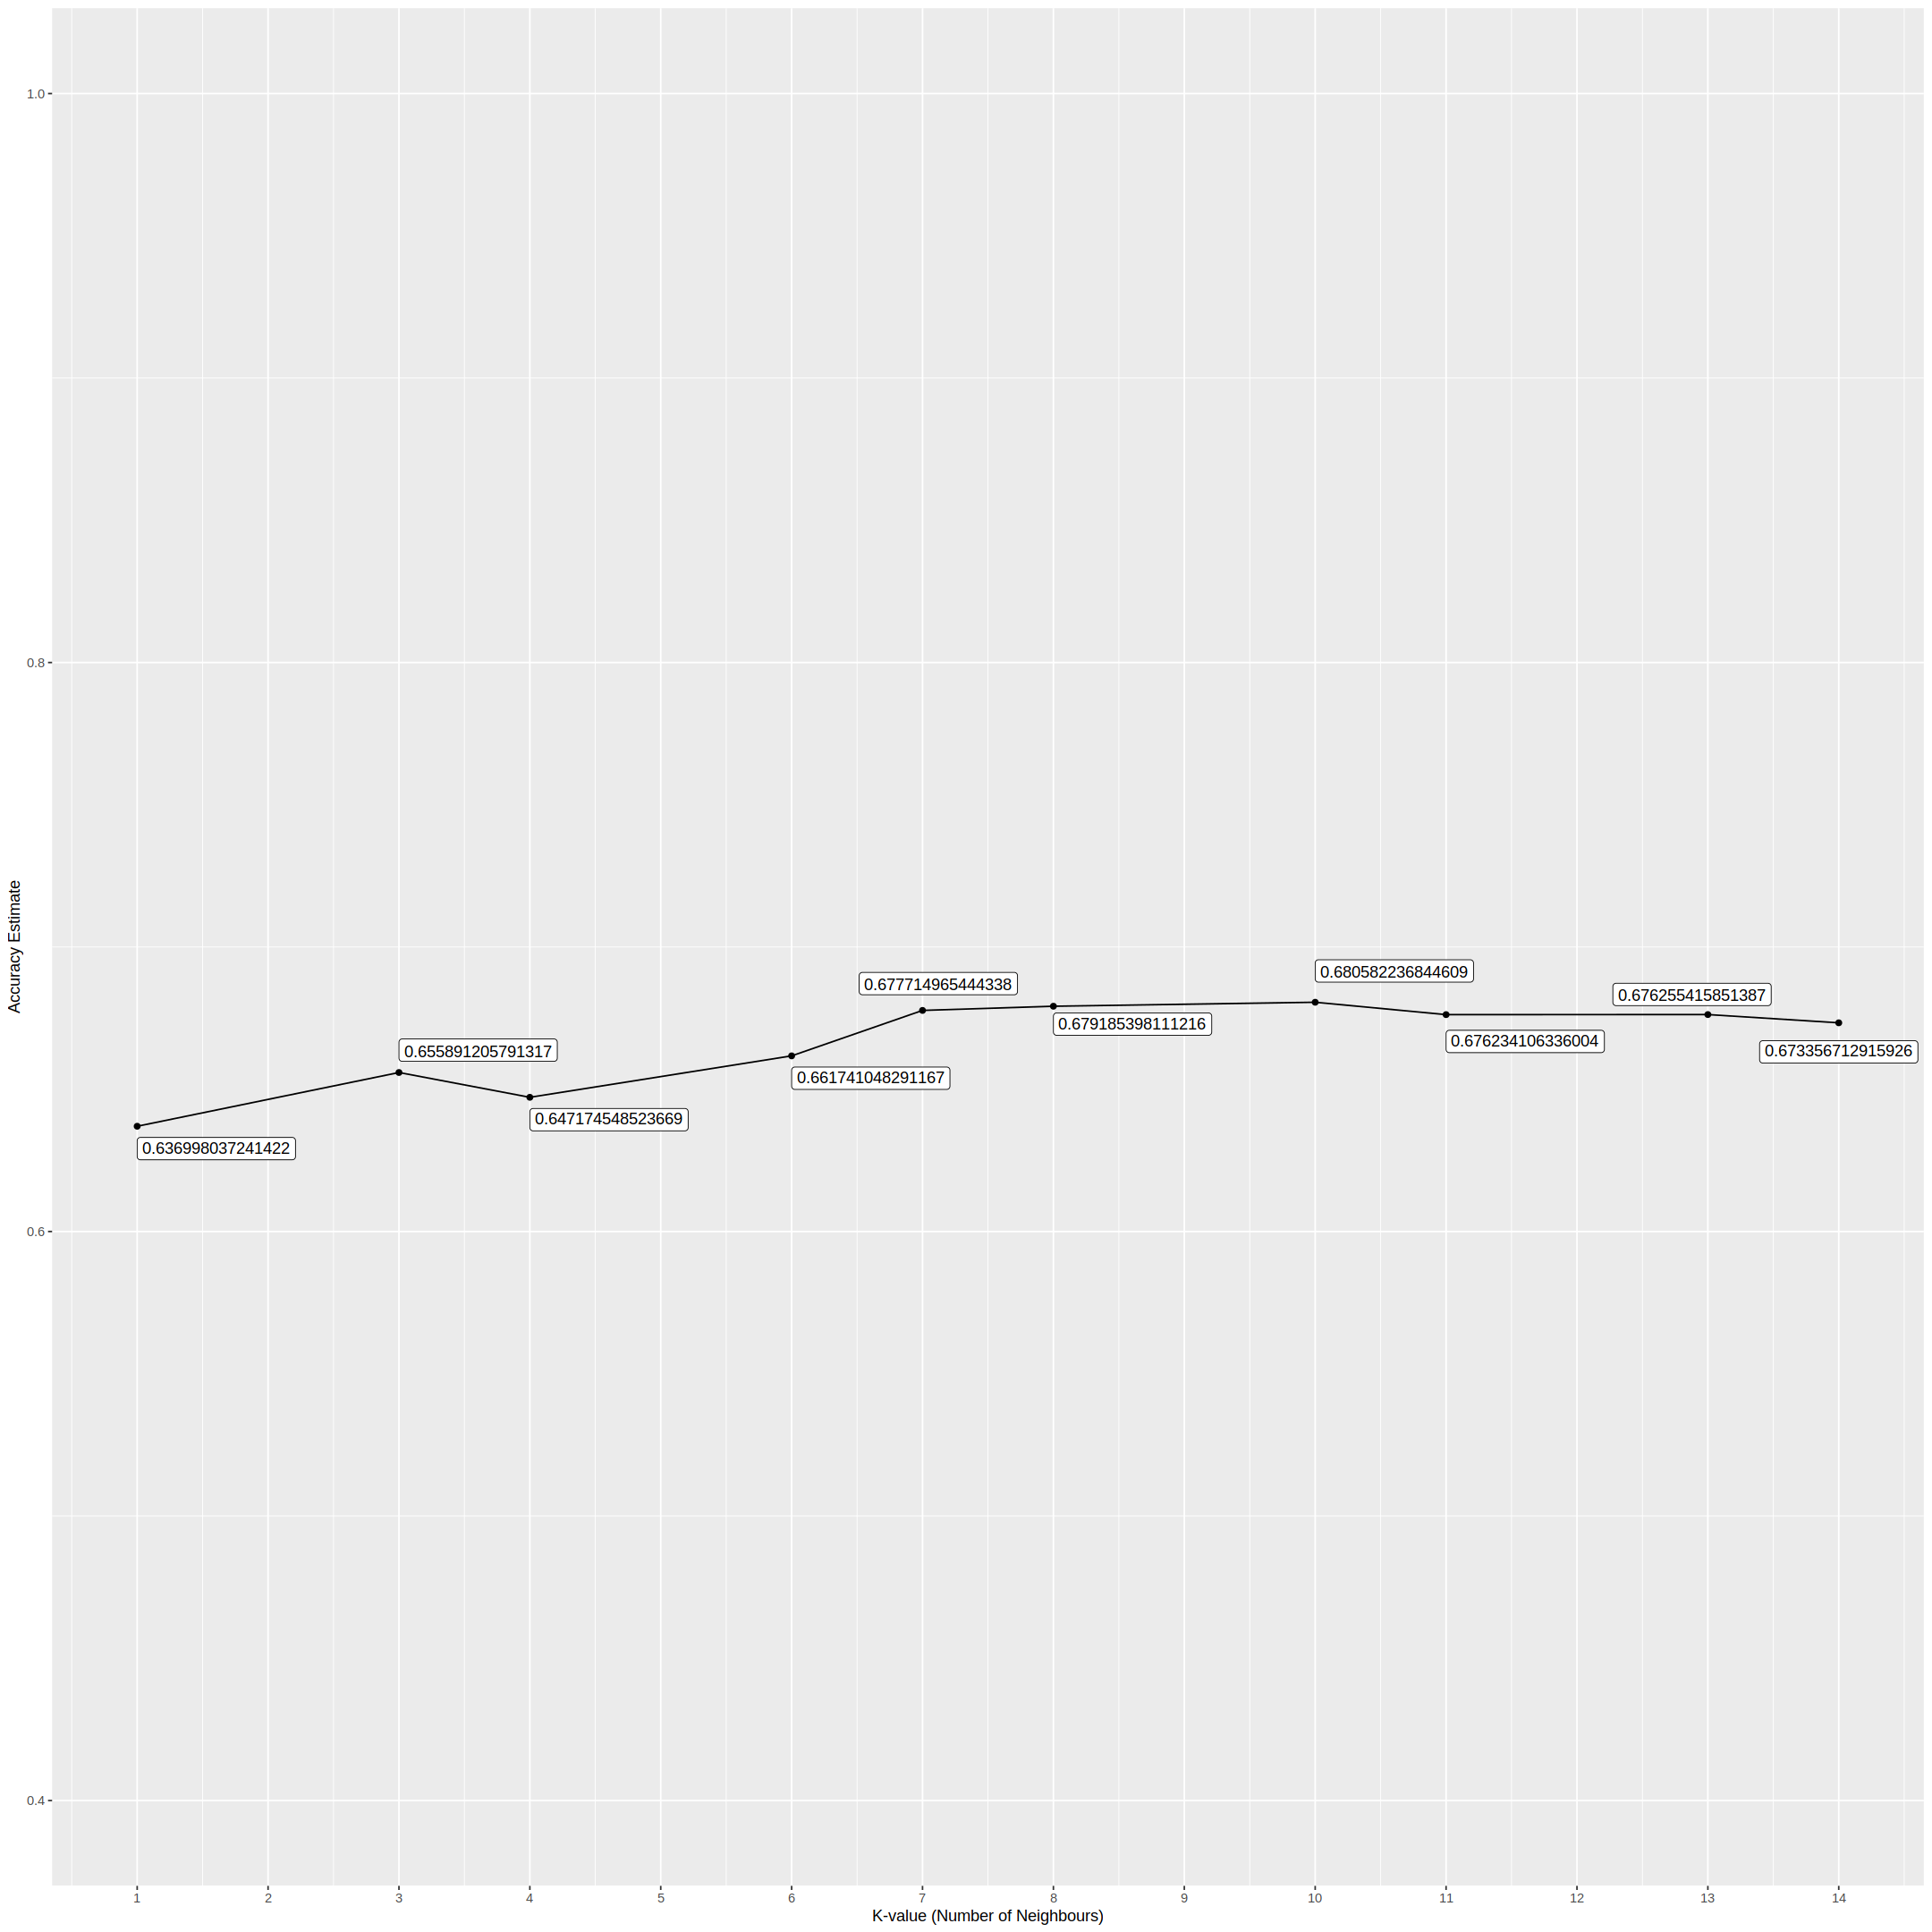

In [37]:
accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                     geom_point(aes(neighbors, mean)) +
                     geom_line(aes(neighbors, mean)) +
                     geom_label(aes(label=mean), hjust=c(0,0,0,0,0.4,0,0,0,0.6,0.5), vjust=c(1.5,-0.5,1.5,1.5,-0.7,1.3,-0.9,1.7,-0.4,1.8)) +
                     labs(x = "K-value (Number of Neighbours)", y = "Accuracy Estimate") +
                     scale_x_continuous(breaks = seq(0, 14, by = 1)) +
                     scale_y_continuous(limits = c(0.4, 1.0))
accuracy_versus_k

# geom_label(aes(label=mean)) +
# , hjust=c(0,0,0,0,0,-1,1,0,0,0), vjust=c(0,0,0,0,0,-1,1,0,0,0)



**Figure 1.** Plot of estimated accuracy versus the number of neighbors.

The line plot suggests that 10 is the value of K that provides the highest accuracy.

Note for team:

Alternatively, we could've imputed the missing entries for numerical variables in heart_data and called prep() and bake() on it to create a brand new dataset before we split heart_data into a training set and a testing set.

However, nowhere in the textbook nor the worksheets/tutorials do they do this.

#### Final Model ####

Now that we have applied cross validation to find the best k value, we can build our final model. We first created the new model specification with the best K value and then passed the model specification and training data into a workflow. 

In [29]:
knn_spec_best <- nearest_neighbor(weight_func = "rectangular", neighbors = 10) |>
       set_engine("kknn") |>
       set_mode("classification")

heart_fit_best <- workflow() |>
               add_recipe(heart_recipe) |>
               add_model(knn_spec_best)|> 
               fit(data = heart_train)

The accuracy of the predictions on the testing data were then explored using a confusion matrix. 

In [30]:
heart_test_predictions_best <- predict(heart_fit_best, heart_test) |> 
    bind_cols(heart_test)

heart_model_metrics_best <- heart_test_predictions_best |> 
        metrics(truth = Class, estimate = .pred_class)

heart_mat_best <- heart_test_predictions_best |> 
    conf_mat(truth = Class, estimate = .pred_class)
heart_mat_best

          Truth
Prediction healthy sick
   healthy      76   32
   sick         27   96

**Table 11.** Confusion matrix of the final heart disease model.

#### Accuracy and Precision ####

In [31]:
text1 = "accuracy =" 
text2 = "precision ="
accuracy = (76 + 96)/ (76+32+27+96)
precision = 96/ (96+32)
print(paste(text1, accuracy)) 
print(paste(text2, precision))

[1] "accuracy = 0.744588744588745"
[1] "precision = 0.75"


<br>

## __Discussion__ ##

To answer our predictive question: 

*How well can the presence of heart disease be predicted in patients through the classification of ST depression induced by exercise relative to rest and maximum heart rate as key factors in the assessment?*


We can look at the accuracy and precision calculated from the confusion matrix: 

The __accuracy__ is about 74.5%, meaning that the model correctly predicted the outcome for 74.5% of the instances in the data set. 

The __precision__ is about 75.0%, meaning that out of all the patients predicted with heart disease, about 75.0% of the model truly had heart disease. 



The model appears to have a reasonably good performance with respect to the confusion metrics calculated. However, given that the problem at hand is predicting the presence of heart disease, the accuracy and precision of the model become particularly important as false positives and false negatives can have serious consequences when predicting if a patient has heart disease. As such, a higher accuracy and precision valuable would be more desirable. 


This indicates that ST depression induced by exercise relative to rest and maximum heart rate are able to contribute to predicting heart disease. However, to further improve the model's performance in predicting the presence of heart disease, additional risk factors associated with heart disease may be incorporated into the model. 

<br>

## __References__ ##


Janosi, A., Steinbrunn, W., Pfisterer, M., & Detrano, R. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.
    
    

# Expected outcomes and significance #

## What do you expect to find? ##
This study aims to propose an accurate classification model for heart disease prediction using a machine learning classification algorithm, K-nearest neighbors, that can effectively categorize individuals based on their medical data.

## What impact could such findings have? ##
The findings of this study could have the potential to make an impact in the field of medical health since an accurate heart disease prediction model can assist intervention measures, which may lead to better patient outcomes.

## What future questions could this lead to? ##
Future questions that this could raise involve the comparability of the K-nearest neighbors classifier model to other models. <br><br> For example, <br> 1. How does the accuracy of prediction with the K-nearest neighbors approach compare with other prediction models based on different machine learning algorithms?
<br>2. What are the advantages and limitations of the K-nearest neighbors method in comparison to the other methods in the case of predicting the heart disease?




Here's a list of stuff we probably won't need anymore:

Before carrying on with the classification process, I am going to clean the non-imputed dataset in an effort to pick our predictors:

In [32]:
# global_dataset_missing <- global_dataset_missing |>


#       mutate(Class = as.factor(Class)) |>
#       mutate(Class = fct_recode(Class, "healthy" = "0", "sick" = "1", "sick" = "2", "sick" = "3", "sick" = "4")) |>


#       mutate(sex = as_factor(sex)) |>
#       mutate(sex = fct_recode(sex, "male" = "1", "female" = "0")) |>


#       mutate(cp = as_factor(cp)) |>
#       mutate(cp = fct_recode(cp, "typical angina" = "1", "atypical angina" = "2", "non-anginal pain" = "3", "asymptomatic" = "4")) |>


#       mutate(fbs = as_factor(fbs)) |>
#       mutate(fbs = fct_recode(fbs, "true" = "1", "false" = "0")) |>      


#       mutate(restecg = as_factor(restecg)) |>
#       mutate(restecg = fct_recode(restecg, "normal" = "0", "ST-T wave abnormality" = "1", "left ventricular hypertrophy" = "2")) |>


#       mutate(exang = as_factor(exang)) |>
#       mutate(exang = fct_recode(exang, "yes" = "1", "no" = "0")) |>


#       mutate(slope = as_factor(slope)) |>
#       mutate(slope = fct_recode(slope, "upsloping" = "1", "flat" = "2", "downsloping" = "3")) |>
      

#       mutate(thal = as_factor(thal)) |>
#       mutate(thal = fct_recode(thal, "normal" = "3", "fixed" = "6", "reversable" = "7"))

# global_dataset_missing <- global_dataset_missing |>
#       rename(Age = age, Sex = sex, "Chest_Pain_Type" = cp, "Resting_Blood_Pressure" = trestbps, Cholesterol = chol, "Fasting_blood_sugar_over_120_mg/dl" = fbs,
#       "Resting_ecg_results" = restecg, "Max_heart_rate" = thalach, "Exercise_induced_angina" = exang, "ST_depression_induced_by_exercise_relative_to_rest" = oldpeak, 
#       "slope_of_the_peak_exercise_ST_segment" = slope, "Number_of_major_vessels_colored_by_flourosopy" = ca, "Thalassemia" = thal)

# global_dataset_missing